Installing Yahoo Finance api to get data.

In [121]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


A kernel restart required after installation, and re-run the code then start Importing important libraries.

In [122]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

Historical data via YF of Tesla (TSLA) stock.

In [123]:
dd1 = yf.download("TSLA", start="2020-02-01", end="2021-02-01")
dd2 = yf.download("TSLA", start="2020-09-01", end="2021-02-28")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Check downloaded data.

In [124]:
dd1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-02-03 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [125]:
dd2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2020-08-31 to 2021-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       123 non-null    float64
 1   High       123 non-null    float64
 2   Low        123 non-null    float64
 3   Close      123 non-null    float64
 4   Adj Close  123 non-null    float64
 5   Volume     123 non-null    float64
dtypes: float64(6)
memory usage: 6.8 KB


Plot the movement (shape) of the stock (Close/Adj Close price)

In [126]:
log_return1 = np.log(dd2['Adj Close'] / dd2['Adj Close'].shift(1))

In [127]:
normal_return = []
for i in range(0,len(dd1)-1):
    adjclose_yesterday = dd1.iloc[i]['Adj Close']
    adjclose_today = dd1.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.13725642668895233,
 -0.17175839109965335,
 0.019409316438660583,
 -0.0011883747086235807,
 0.031026497120937944]

In [128]:
log_return = []
for i in range(0,len(dd1)-1):
    adjclose_yesterday = dd1.iloc[i]['Adj Close']
    adjclose_today = dd1.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.1286187185304459,
 -0.18845036897286446,
 0.019223358021399697,
 -0.0011890813857678983,
 0.03055490511285429]

Annulized Return

In [129]:
fn = pd.DataFrame(normal_return, columns = ['normal']) 
nr = fn.mean() * len(fn)
nv = fn.std() * (len(fn) ** 0.5)
print('Annulized normal return = %.8f' % nr)
print('Annulized by = %.8f' % nv)

Annulized normal return = 2.01571430
Annulized by = 0.87352919


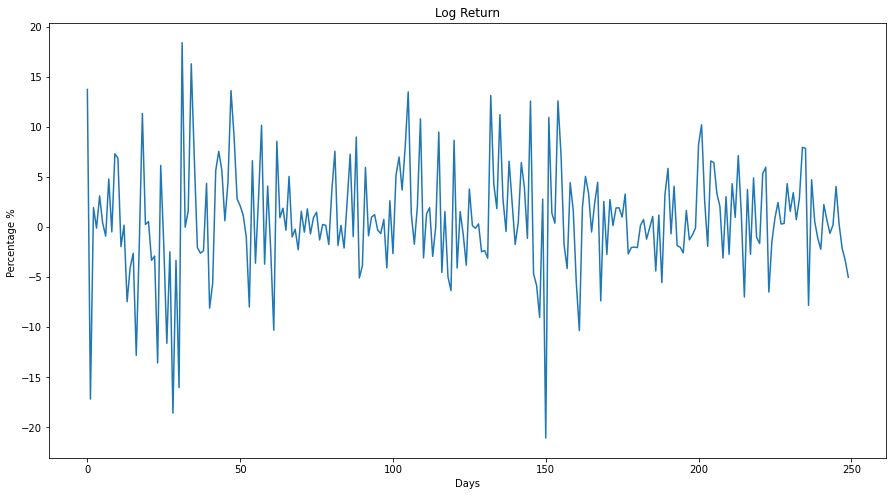

In [130]:
fig = plt.figure(figsize= (15, 8))
plt.plot(fn * 100) 
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

The last one year annualised volatility

In [131]:
log_return = np.log(dd1['Adj Close'] / dd1['Adj Close'].shift(1))
v = np.sqrt(252) * log_return.std()
print(round(v*100,2))

88.31


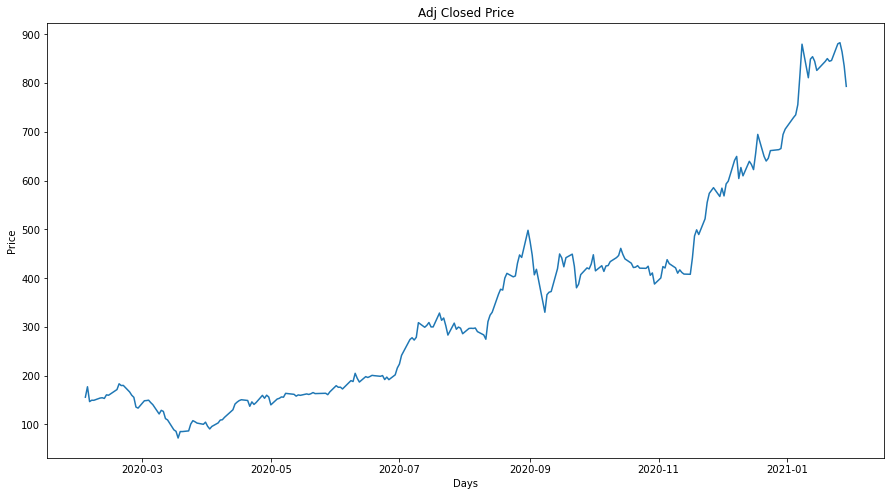

In [132]:
fig = plt.figure(figsize= (15, 8))
plt.plot(dd1['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Adj Closed Price');

Analysing strike

In [133]:
st, ttm = np.meshgrid(np.array([100, 110, 120, 130, 140]), np.array([6/12, 10/12]))
a2 = np.array([np.array([0.369229563, 0.360583371, 0.355315095, 0.356638788, 0.359157824]), 
               np.array([0.348106828, 0.354150754, 0.345219209, 0.346127746, 0.34955913])])
print(a2)

[[0.36922956 0.36058337 0.3553151  0.35663879 0.35915782]
 [0.34810683 0.35415075 0.34521921 0.34612775 0.34955913]]


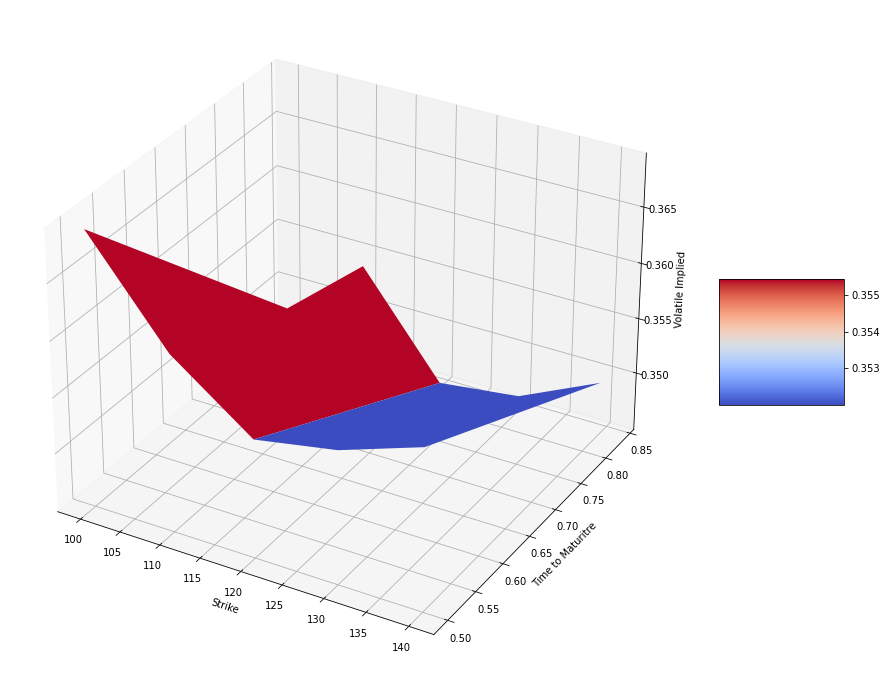

In [134]:
fig = plt.figure(figsize= (15, 15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(st, ttm, a2, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.1, antialiased=True)
ax.set_xlabel('Strike')
ax.set_ylabel('Time to Maturitre')
ax.set_zlabel('Volatile Implied')
fig.colorbar(surf, shrink=0.5, aspect=1,);

Historical last 6 months data of Tesla (TSLA), the last six months annualised volatility.

In [135]:
vol = np.sqrt(252) * log_return1.std()
print(round(vol*100,2))

74.5


Option Pricing

In [136]:
T = 1/12
r = 0.0154
sigma = 0.40
S0 = 121.08
K = 120

def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [137]:
S = np.transpose(mcs_simulation_np(900))
print(S)

[[121.08       121.55141427 122.02552845 ... 127.84828336 127.52749925
  126.98358151]
 [121.08       121.04437452 121.046978   ... 114.27988247 115.3101347
  115.29832135]
 [121.08       120.79235533 120.24925698 ... 105.53172284 106.41679637
  106.38694274]
 ...
 [121.08       120.88999411 120.30373615 ... 131.26994336 131.92676641
  132.17480484]
 [121.08       120.3795428  120.40260887 ... 141.77239007 142.0113733
  143.01646808]
 [121.08       121.43941212 122.14966326 ... 131.55018626 131.27472658
  131.03037674]]


Frequency distribution of end of preiod

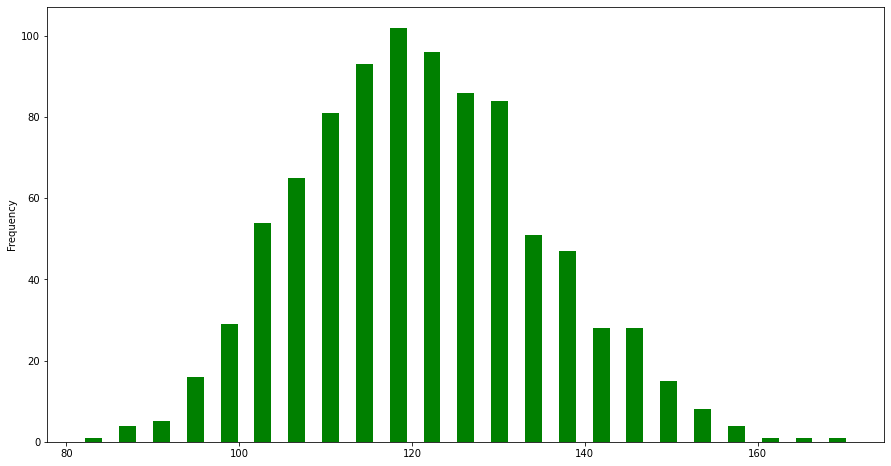

In [138]:
fig = plt.figure(figsize= (15, 8))
n, bins, patches = plt.hist(x=S[:,-1], color='green', bins='auto', rwidth=0.5)
plt.grid(alpha=0)
ax = plt.ylabel('Frequency')

In [139]:
put = (K - S[-1,:])>0
call = (S[-1,:]  - K)>0
px = np.mean(np.maximum(put.astype(int),0))
cx = np.mean(np.maximum(call.astype(int),0))
print(cx, px, cx + px)

0.9100998890122086 0.08990011098779134 1.0


BSM Option

In [140]:
def binary_option_bsm(S, K, T, r, q, vol, payoff):    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-q * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = np.exp(-q * T) * si.norm.cdf(-d2, 0.0, 1.0)    
    return option_value

In [141]:
binary_option_bsm(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put')

0.48764569475037783

In [142]:
binary_option_bsm(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call')

0.5123543052496222

In [143]:
(binary_option_bsm(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put')+binary_option_bsm(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call'))

1.0

Greeks Calculation, Delta

In [144]:
def delta(S, K, T, r, q, vol, payoff):    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/(vol * S * np.sqrt(T))
    elif payoff == "put":
        delta =  - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/(vol * S * np.sqrt(T))    
    return delta

print(delta(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call'))
print(delta(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put'))

S = np.linspace(50,150,11)
dc = np.zeros((len(S),1))
dp = np.zeros((len(S),1))
for i in range(len(S)):
    dc [i] = delta(S[i], 120, 1/12, 0.0154, 0, 0.4, 'call')
    dp [i] = delta(S[i], 120, 1/12, 0.0154, 0, 0.4, 'put')

0.028484108464339467
-0.028484108464339467


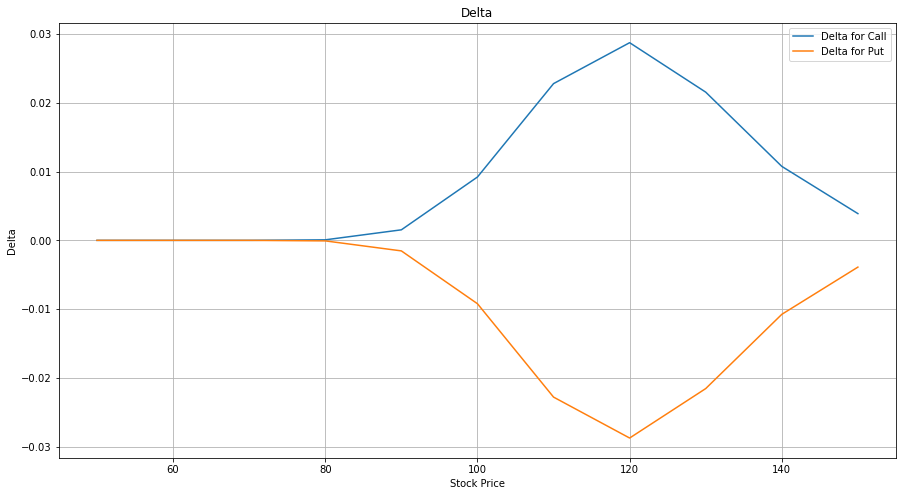

In [145]:
fig = plt.figure(figsize= (15, 8))
plt.plot(S, dc, '-')
plt.plot(S, dp, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
ax = plt.legend(['Delta for Call','Delta for Put'])

In [146]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 120, T[i], 0.0154, 0, 0.4, 'put')

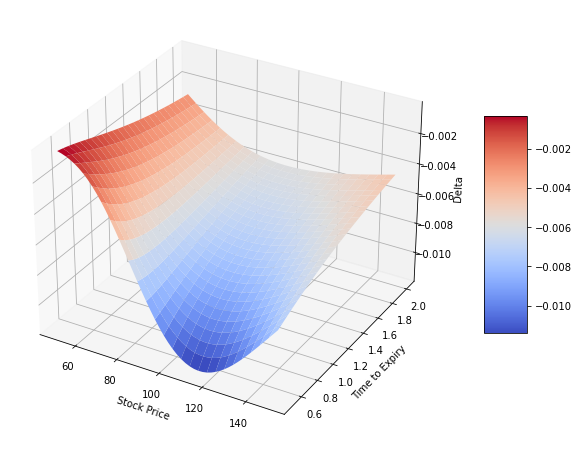

In [147]:
fig = plt.figure(figsize= (15, 8))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

Gama expression, Gama

In [148]:
def gamma(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        gamma = -(np.exp(-r * T) * d1* si.norm.pdf(d2, 0.0, 1.0) / (vol**2 * S**2 *(T)))
    elif payoff == "put":
        gamma = (np.exp(-r * T) * d1* si.norm.pdf(d2, 0.0, 1.0) / (vol**2 * S**2 *(T)))
    return gamma

print(gamma(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call'))
print(gamma(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put'))

S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma[i] = gamma(S[i], 120, 1/12, 0.0154, 0, 0.4, 'put')

-0.0002983516522106859
0.0002983516522106859


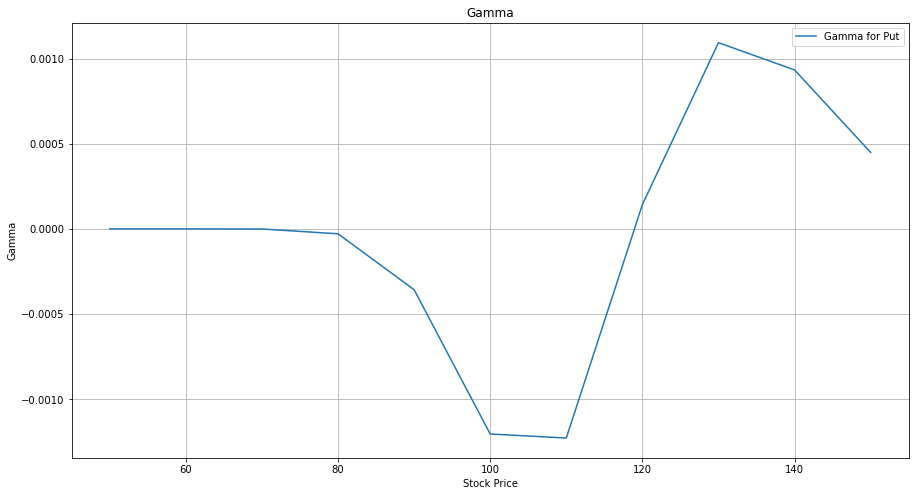

In [149]:
fig = plt.figure(figsize= (15, 8))
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
ax = plt.legend(['Gamma for Put'])

In [150]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 120, T[i], 0.0154, 0, 0.4, 'put')

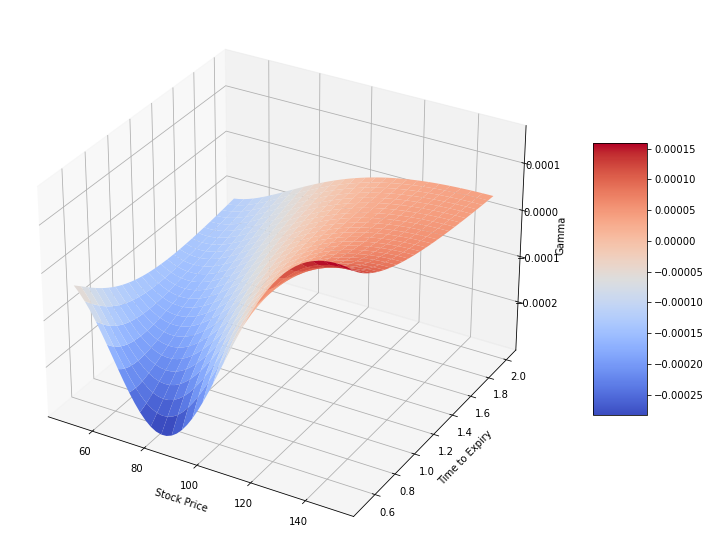

In [151]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

Speed Analysis

In [152]:
def speed(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        speed =-((np.exp(-r*T)*si.norm.pdf(d2,0.0,1))/(vol**2*S**3*T))*(-2*d1 + (1-d1*d2)/(vol*np.sqrt(T)))
    elif payoff == "put":
        speed =((np.exp(-r*T)*si.norm.pdf(d2,0.0,1))/(vol**2*S**3*T))*(-2*d1 + (1-d1*d2)/(vol*np.sqrt(T)))
    return speed

print(speed(121.08,120,1/12,0.0154,0,0.4,'call'))
print(speed(121.08,120,1/12,0.0154,0,0.4,'put'))

S = np.linspace(80,180,15)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')

-0.00014013085131996946
0.00014013085131996946


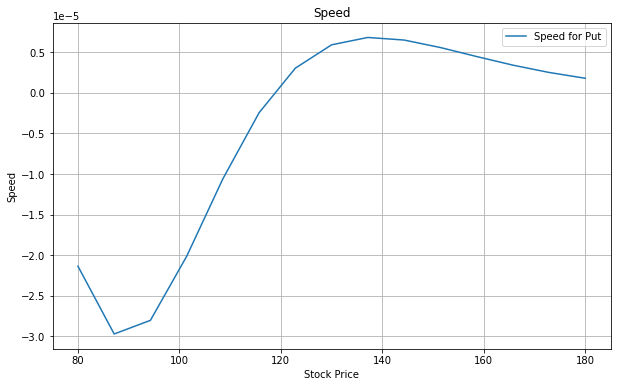

In [161]:
fig = plt.figure(figsize=(10, 6))
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

Vega

In [156]:
def vega(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        vega = -((np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((np.sqrt(T)) + (d2/vol)))
    elif payoff == "put":
        vega = (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((np.sqrt(T)) + (d2/vol))
    return vega

print(vega(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call'))
print(vega(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put'))


vol = np.linspace(0.1,0.6,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(121.08, 120, 1/12, 0.0154, 0, vol[i], 'call')

-0.14579815124846746
0.14579815124846746


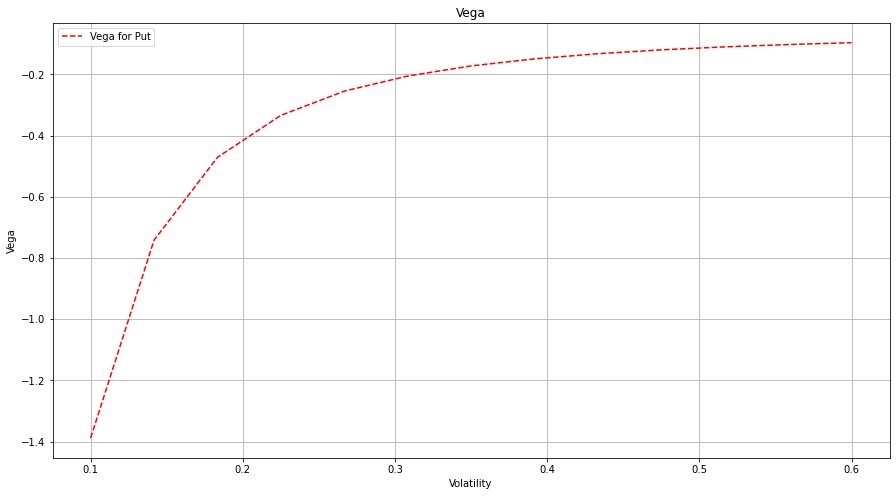

In [160]:
fig = plt.figure(figsize= (15, 8))
plt.plot(vol, Vega, '--', color='Red')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])